In [192]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import math
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import davies_bouldin_score


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pl      300 non-null    float64
 1   pw      300 non-null    float64
 2   sl      300 non-null    float64
 3   sw      300 non-null    float64
 4   id      300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


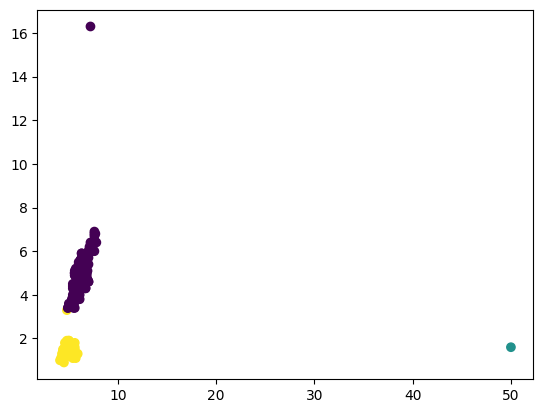

{np.int32(0): np.int64(193), np.int32(1): np.int64(1), np.int32(2): np.int64(106)}


In [ ]:
# Task 0
data = pd.read_csv("iris_clusters.csv", delimiter=";")
data.info()
# TASK 1: k-Means clustering
data = data.drop(columns="id")
kmeans=KMeans(n_clusters=3) 
kmeans.fit(data)

# kmeans.labels_ 
# kmeans.cluster_centers_

plt.scatter(data["pl"], data["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()

unique, counts =np.unique(kmeans.labels_, return_counts=True)

print(dict(zip(unique, counts)))

In [167]:
def drop_largest_dist(df: pd.DataFrame, keep=0.95):
    processed_data = df.copy()
    neigh = NearestNeighbors(n_neighbors=3).fit(processed_data)
    df = pd.DataFrame(neigh.kneighbors(processed_data)[0])
    df = df.sum(axis=1)
    processed_data["dist"] = df
    processed_data = processed_data.drop(processed_data.sort_values("dist",ascending=False)[:int(len(processed_data) * (1-keep))].index)
    return processed_data


# preprocessedData1 = data.copy()
# preprocessedData1 = drop_largest_dist(preprocessedData1, keep=0.95)
# print(preprocessedData1)

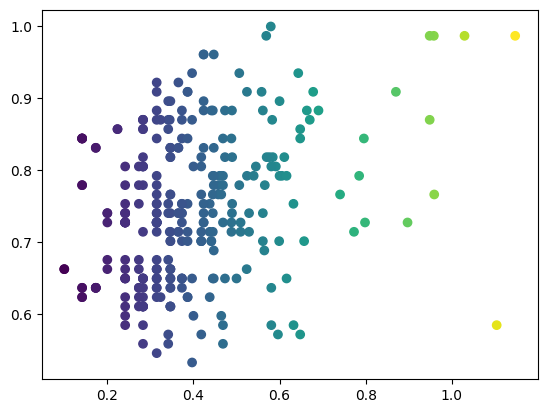

            pl        pw        sl        sw
min   0.532468  0.422222  0.130435  0.038462
max   1.000000  1.000000  1.000000  1.000000
mean  0.746775  0.669809  0.527790  0.469308


In [186]:
# TASK 2: Preprocessing (outlier -> normalization)
preprocessedData1 = data.copy()

preprocessedData1 = drop_largest_dist(preprocessedData1, keep=0.99)
preprocessedData1[['pl', 'pw', 'sl', 'sw']] = normalize(preprocessedData1[['pl', 'pw', 'sl', 'sw']], norm='max', axis=0)


plt.scatter(preprocessedData1["dist"], preprocessedData1["pl"], c=preprocessedData1["dist"], cmap='viridis')
plt.show()

stats = preprocessedData1[['pl', 'pw', 'sl', 'sw']].agg(["min", "max", "mean"])
print(stats)

workingData = preprocessedData1.drop(columns="dist")


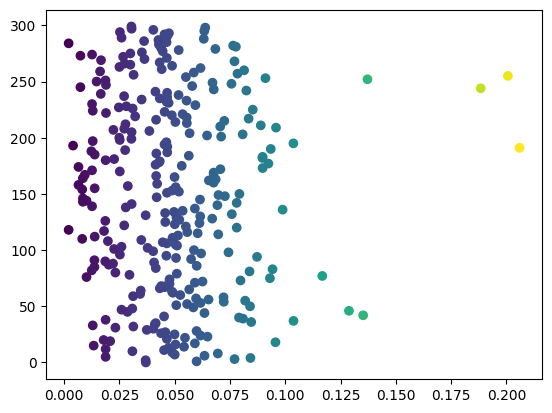

            pl        pw        sl        sw
min   0.082000  0.422222  0.055215  0.038462
max   0.156000  1.000000  0.417178  1.000000
mean  0.115017  0.670707  0.223317  0.468790


In [171]:
# TASK 2: Preprocessing (normalization -> outlier)

preprocessedData2 = data.copy()

preprocessedData2[['pl', 'pw', 'sl', 'sw']] = normalize(preprocessedData2[['pl', 'pw', 'sl', 'sw']], norm='max', axis=0)
preprocessedData2 = drop_largest_dist(preprocessedData2, keep=0.99)


plt.scatter(preprocessedData2["dist"], preprocessedData2.index, c=preprocessedData2["dist"], cmap='viridis')
plt.show()

stats = preprocessedData2[['pl', 'pw', 'sl', 'sw']].agg(["min", "max", "mean"])
print(stats)

[[0.64291899 0.75259259 0.20938578 0.11684982]
 [0.83568011 0.65052632 0.78443936 0.8048583 ]
 [0.77212478 0.59908362 0.62109667 0.5222046 ]]


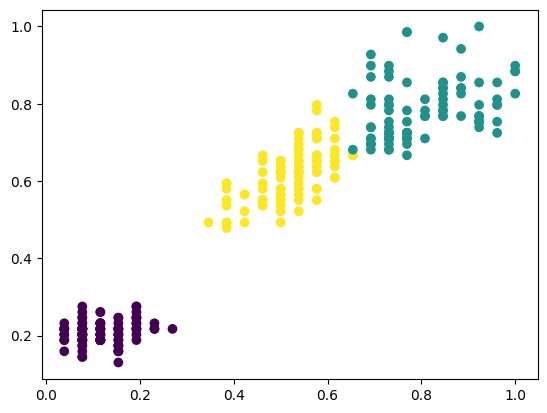

{np.int32(0): np.int64(105), np.int32(1): np.int64(95), np.int32(2): np.int64(97)}


In [188]:


kmeans=KMeans(n_clusters=3) 
kmeans.fit(workingData)

# kmeans.labels_ 
print(kmeans.cluster_centers_)

plt.scatter(workingData["sw"], workingData["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()

unique, counts =np.unique(kmeans.labels_, return_counts=True)

print(dict(zip(unique, counts)))



In [194]:
ks = range(2,10+1)
for k in ks:
    kmeans=KMeans(n_clusters=k) 
    kmeans.fit(workingData)
    dbs = davies_bouldin_score(workingData, kmeans.labels_)
    print(f"k={k}, score: {dbs}")
k = 2


k=2, score: 0.4017492338505025
k=3, score: 0.6639302994573105
k=4, score: 0.8414632356462955
k=5, score: 0.88398495762237
k=6, score: 1.0131487602328575
k=7, score: 1.0501304757043848
k=8, score: 1.0520475700154144
k=9, score: 1.0806539941840545
k=10, score: 1.0334558154165334


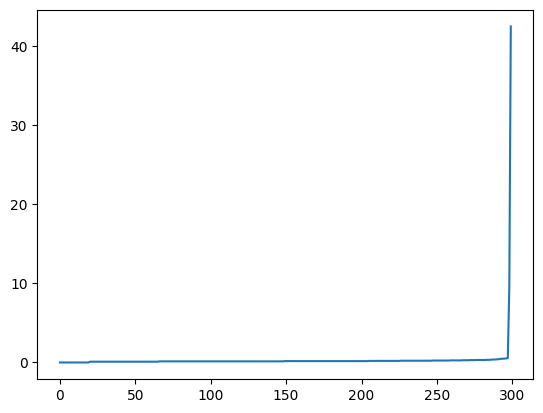

In [174]:
# Plot k-distances (given from assignment)
def k_distances2(X,n):
    neighbors = NearestNeighbors(n_neighbors=n)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    return distances, indices

# TODO: add your parameters here.
# data -- your normalized dataset
# k -- k-th neighbour. By default, k=count(features)+1
distances, indices = k_distances2(data,5)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()
